### Data science project - Health - Diabetes dataset

Data analysis tasks every student should follow this protocol:

Descriptive statistics:
* Building Summary 
* Calculate Central/Dispersion measures 
* Get the distribution of the data (each column)
* Analyze relationships between features

EDA for every possible questions assigned by another group:
* Identify the variable and their types 
* Clean your data (error, remove duplicates, missing values, Outliers)
* Transformation (Standardization, Normalization, encoding categorical to numerical)
* Data Visualization (use the suitable visualization that you need)

Define your research questions/objectives:
* Perform Hypothesis testing
* Interpret the results findings in the context of your research question or objective. Draw conclusions and make recommendations based on your analysis.
* Communicate your results: Present your insights and conclusions in a clear and concise manner, using visualizations and descriptive statistics. Tailor your communication to your audience, whether it be technical or non-technical.


### About the dataset:

diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 

* 0 is for no diabetes or only during pregnancy, 
* 1 is for prediabetes, and 
* 2 is for diabetes. 

There is class imbalance in this dataset. This dataset has 21 feature variables. 

### Research questions:

* What is the prevalence of diabetes, high blood pressure, high cholesterol, stroke, heart disease or attack among the population?
* Is there a relationship between certain risk factors (such as smoking, physical activity, diet) and the prevalence of these health conditions?
* Are there any significant differences in health outcomes based on demographic factors like age, sex, education, and income?

#### Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import ttest_ind_from_stats

#### Step1: Descriptive statistics

In [3]:
#Load the dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
#Building summary
summary = df.describe
print("Summary: ")
summary

Summary: 


<bound method NDFrame.describe of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealt

In [5]:
# Calculate Central/Dispersion measures
central_measures = df.mean()
dispersion_measures = df.std()
print("\nCentral Measures (Mean):")
print(central_measures)
print("\nDispersion Measures (Standard Deviation):")
print(dispersion_measures)


Central Measures (Mean):
Diabetes_012             0.296921
HighBP                   0.429001
HighChol                 0.424121
CholCheck                0.962670
BMI                     28.382364
Smoker                   0.443169
Stroke                   0.040571
HeartDiseaseorAttack     0.094186
PhysActivity             0.756544
Fruits                   0.634256
Veggies                  0.811420
HvyAlcoholConsump        0.056197
AnyHealthcare            0.951053
NoDocbcCost              0.084177
GenHlth                  2.511392
MentHlth                 3.184772
PhysHlth                 4.242081
DiffWalk                 0.168224
Sex                      0.440342
Age                      8.032119
Education                5.050434
Income                   6.053875
dtype: float64

Dispersion Measures (Standard Deviation):
Diabetes_012            0.698160
HighBP                  0.494934
HighChol                0.494210
CholCheck               0.189571
BMI                     6.608694
Smo

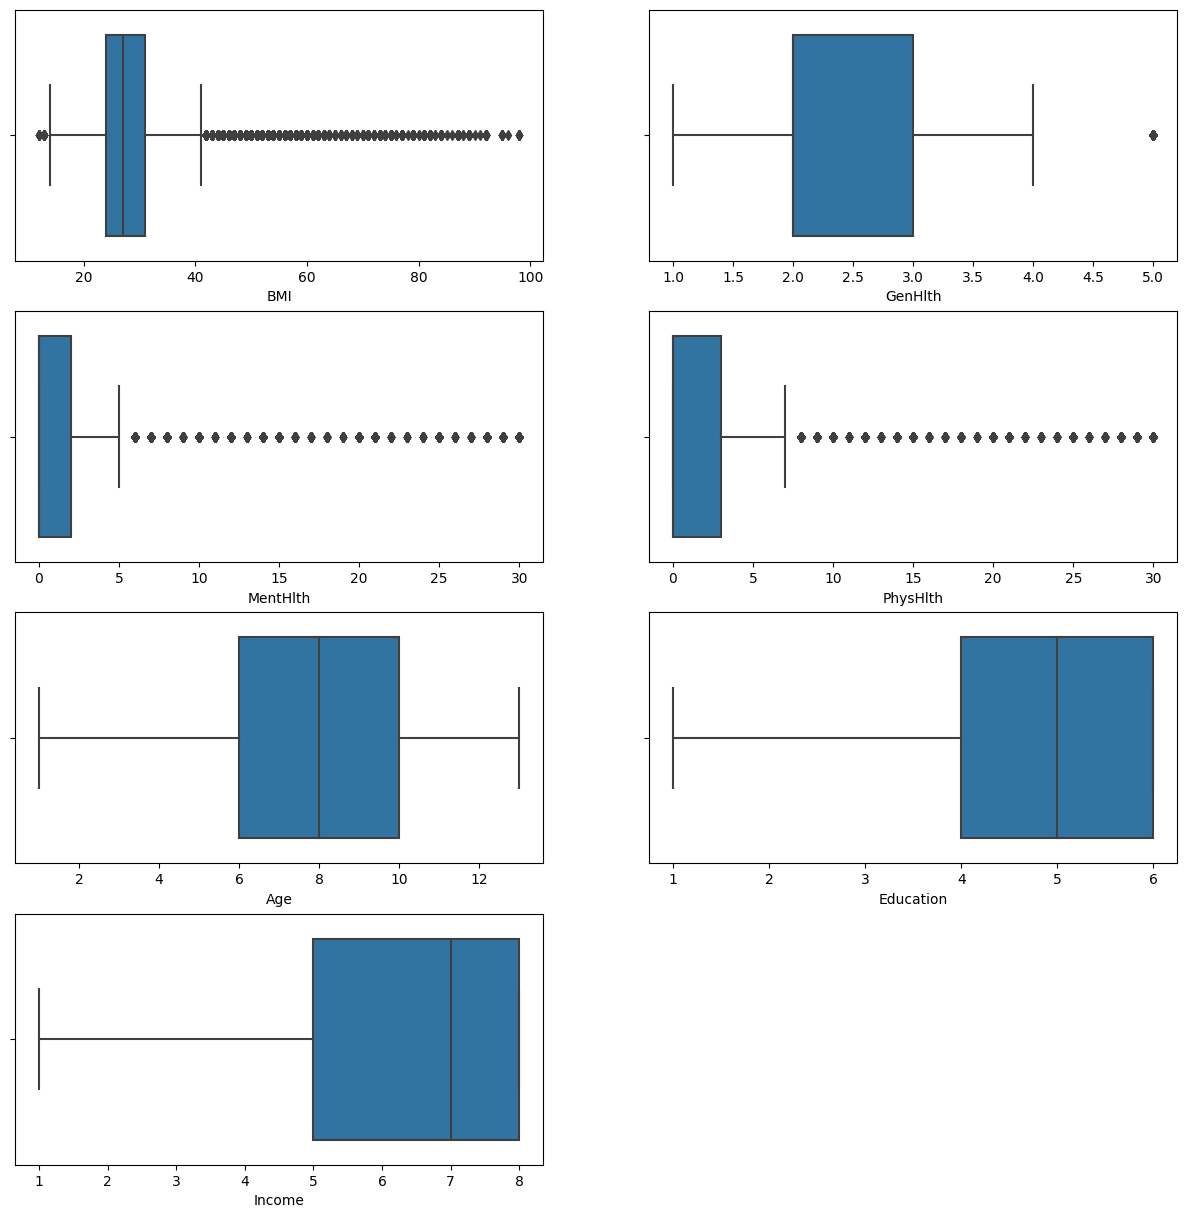

In [6]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df )
plt.show()

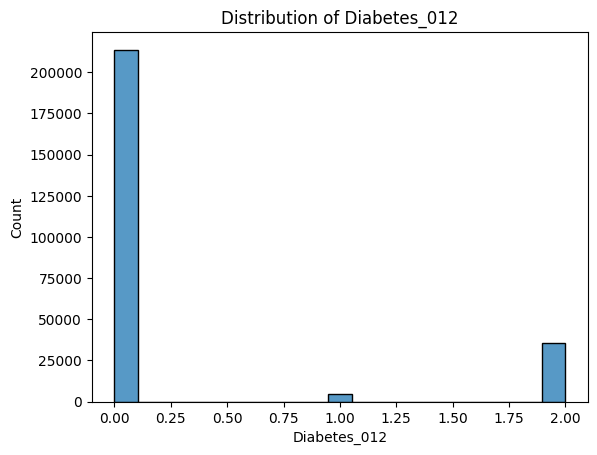

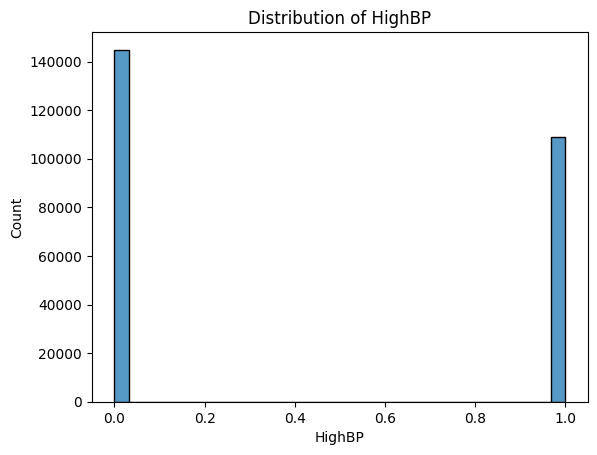

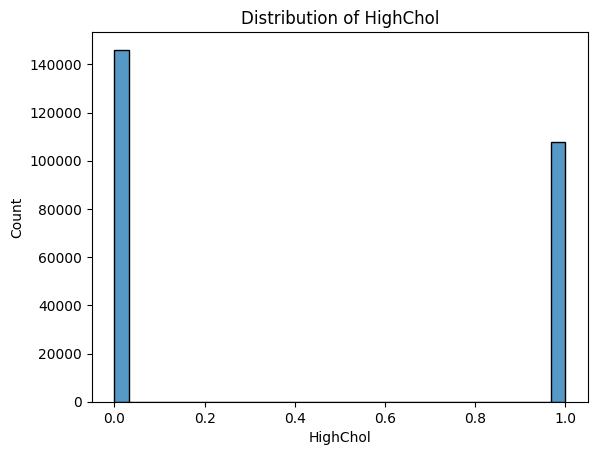

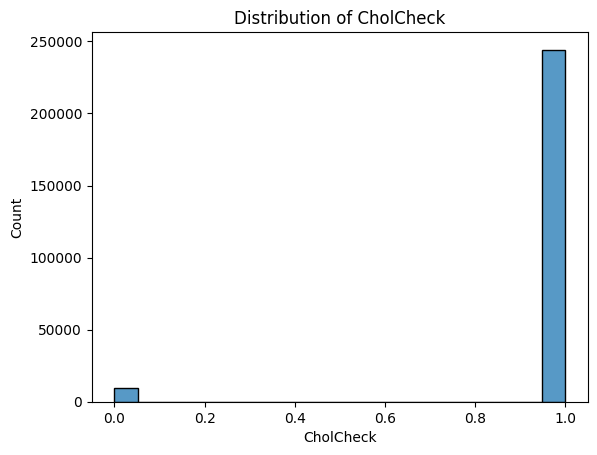

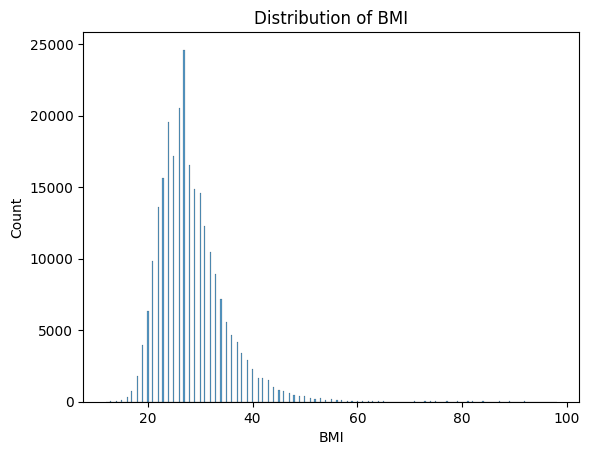

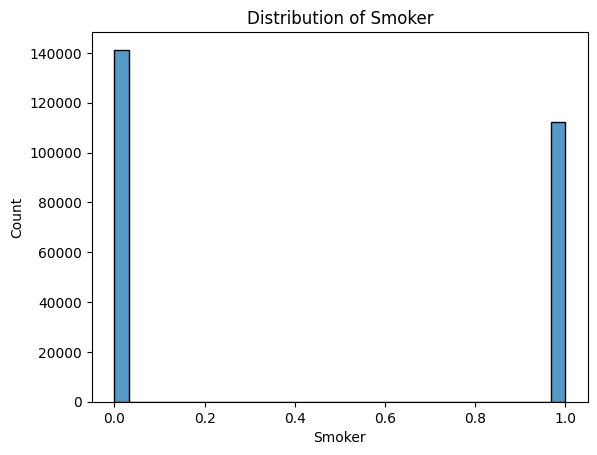

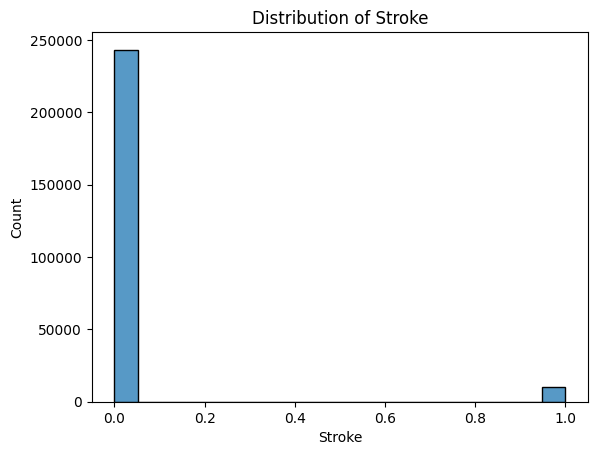

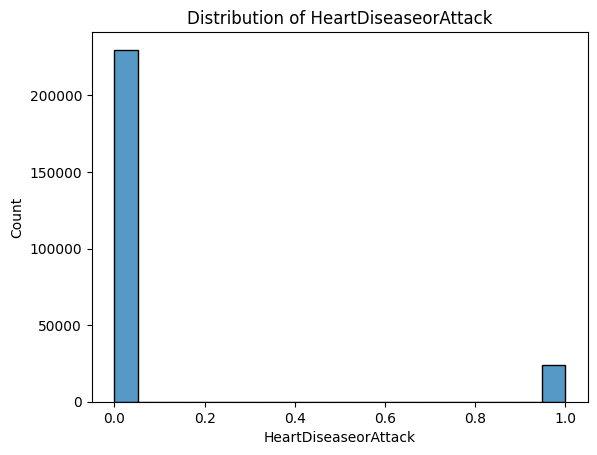

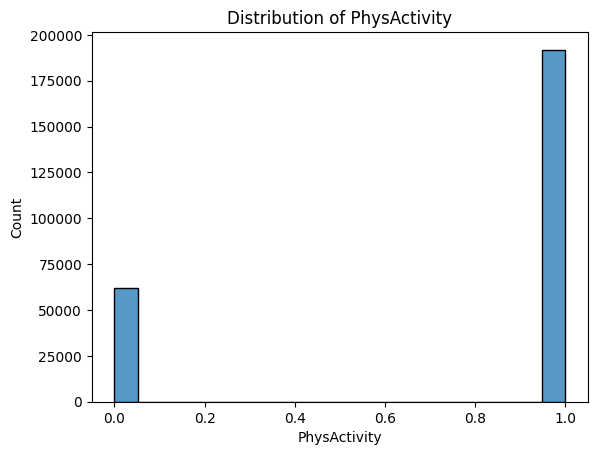

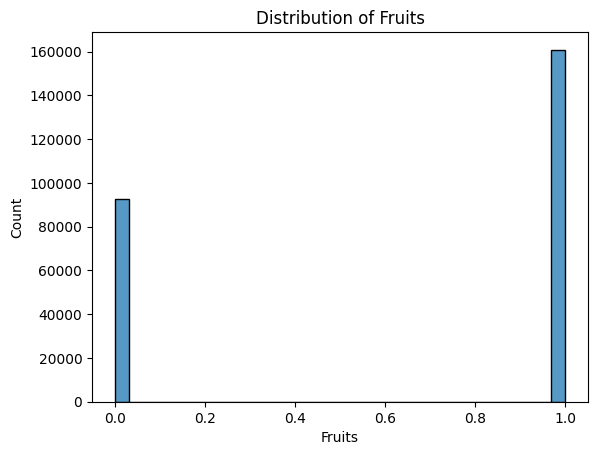

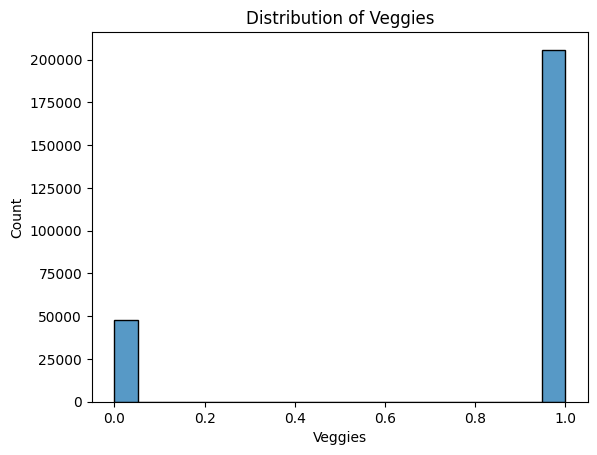

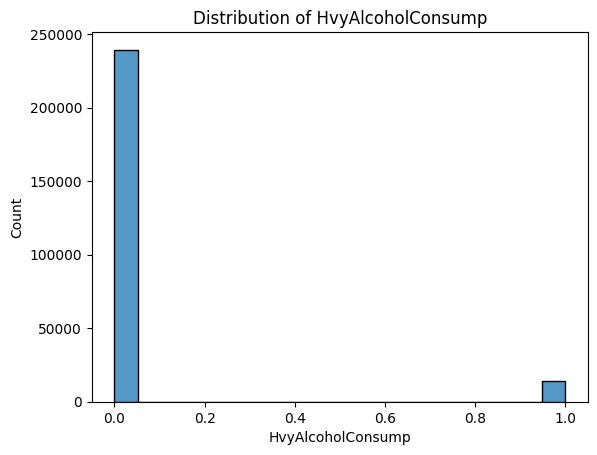

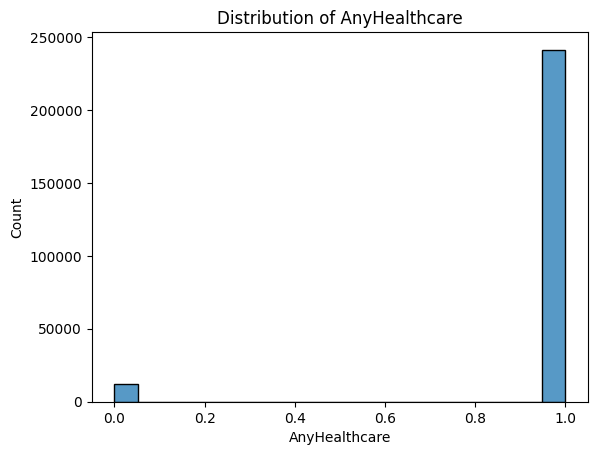

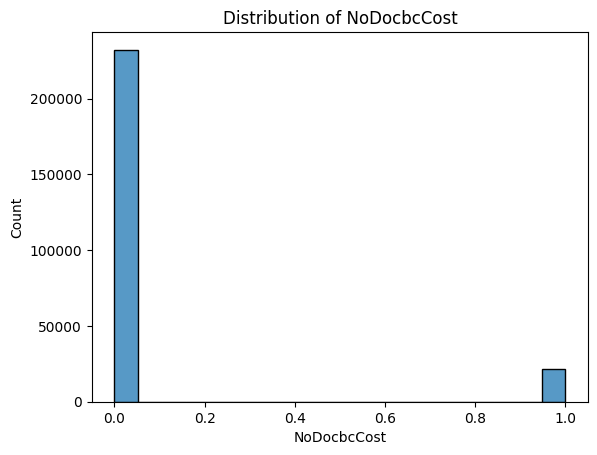

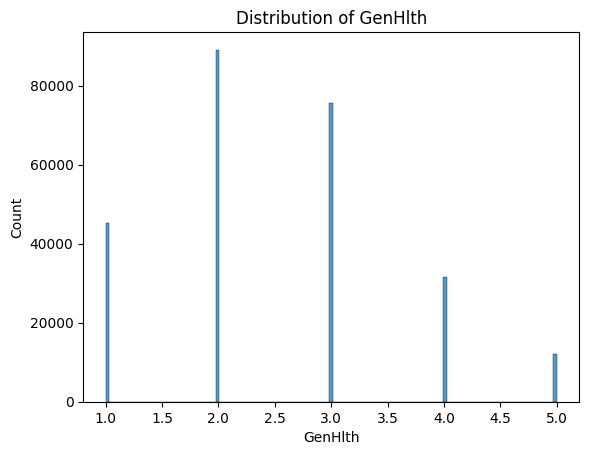

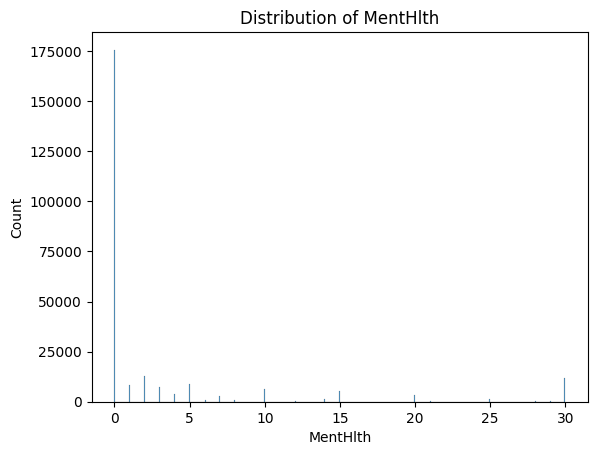

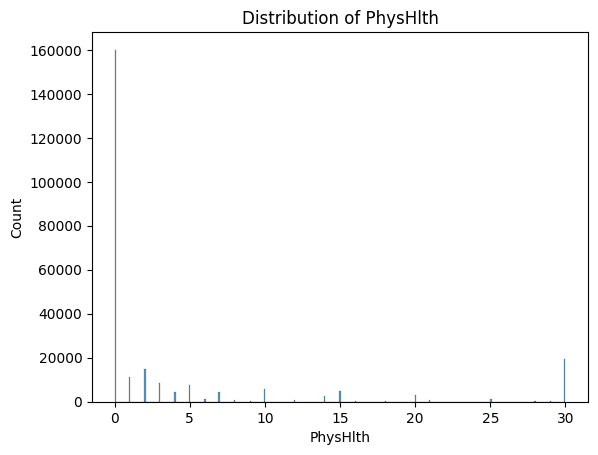

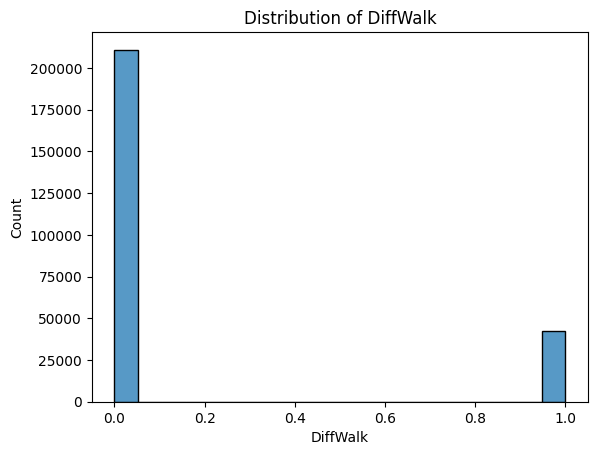

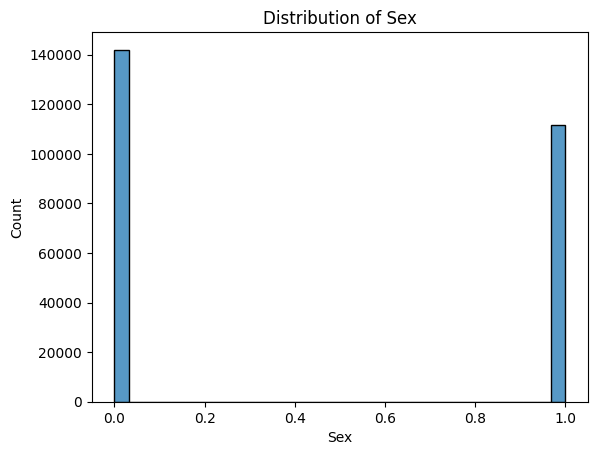

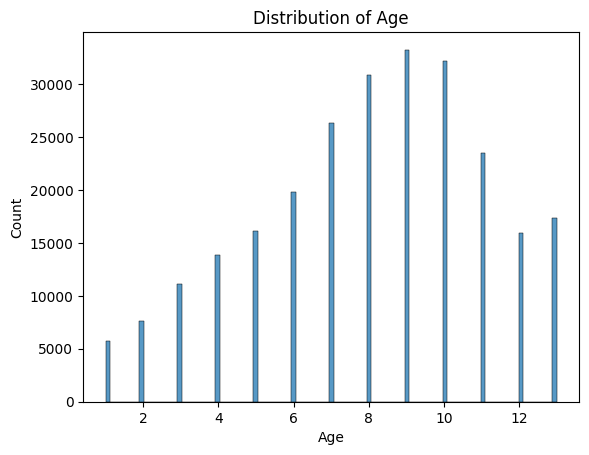

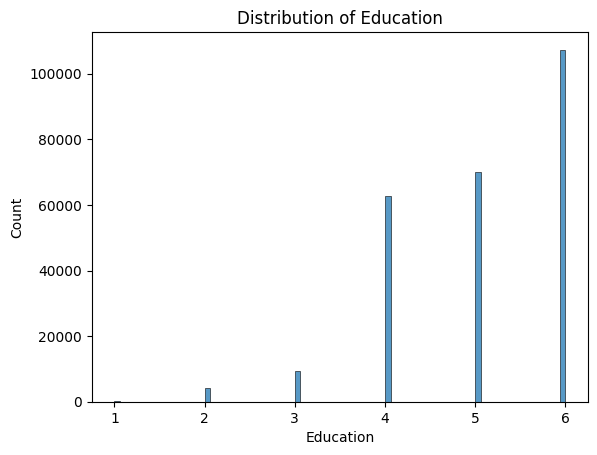

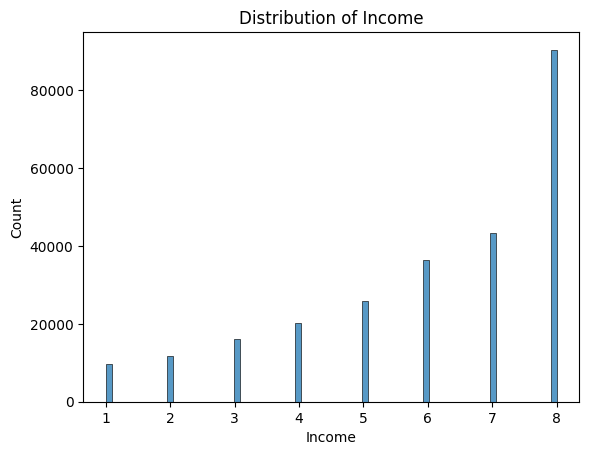

In [7]:
# Get the distribution of the data (each column)
for column in df.columns:
    sns.histplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

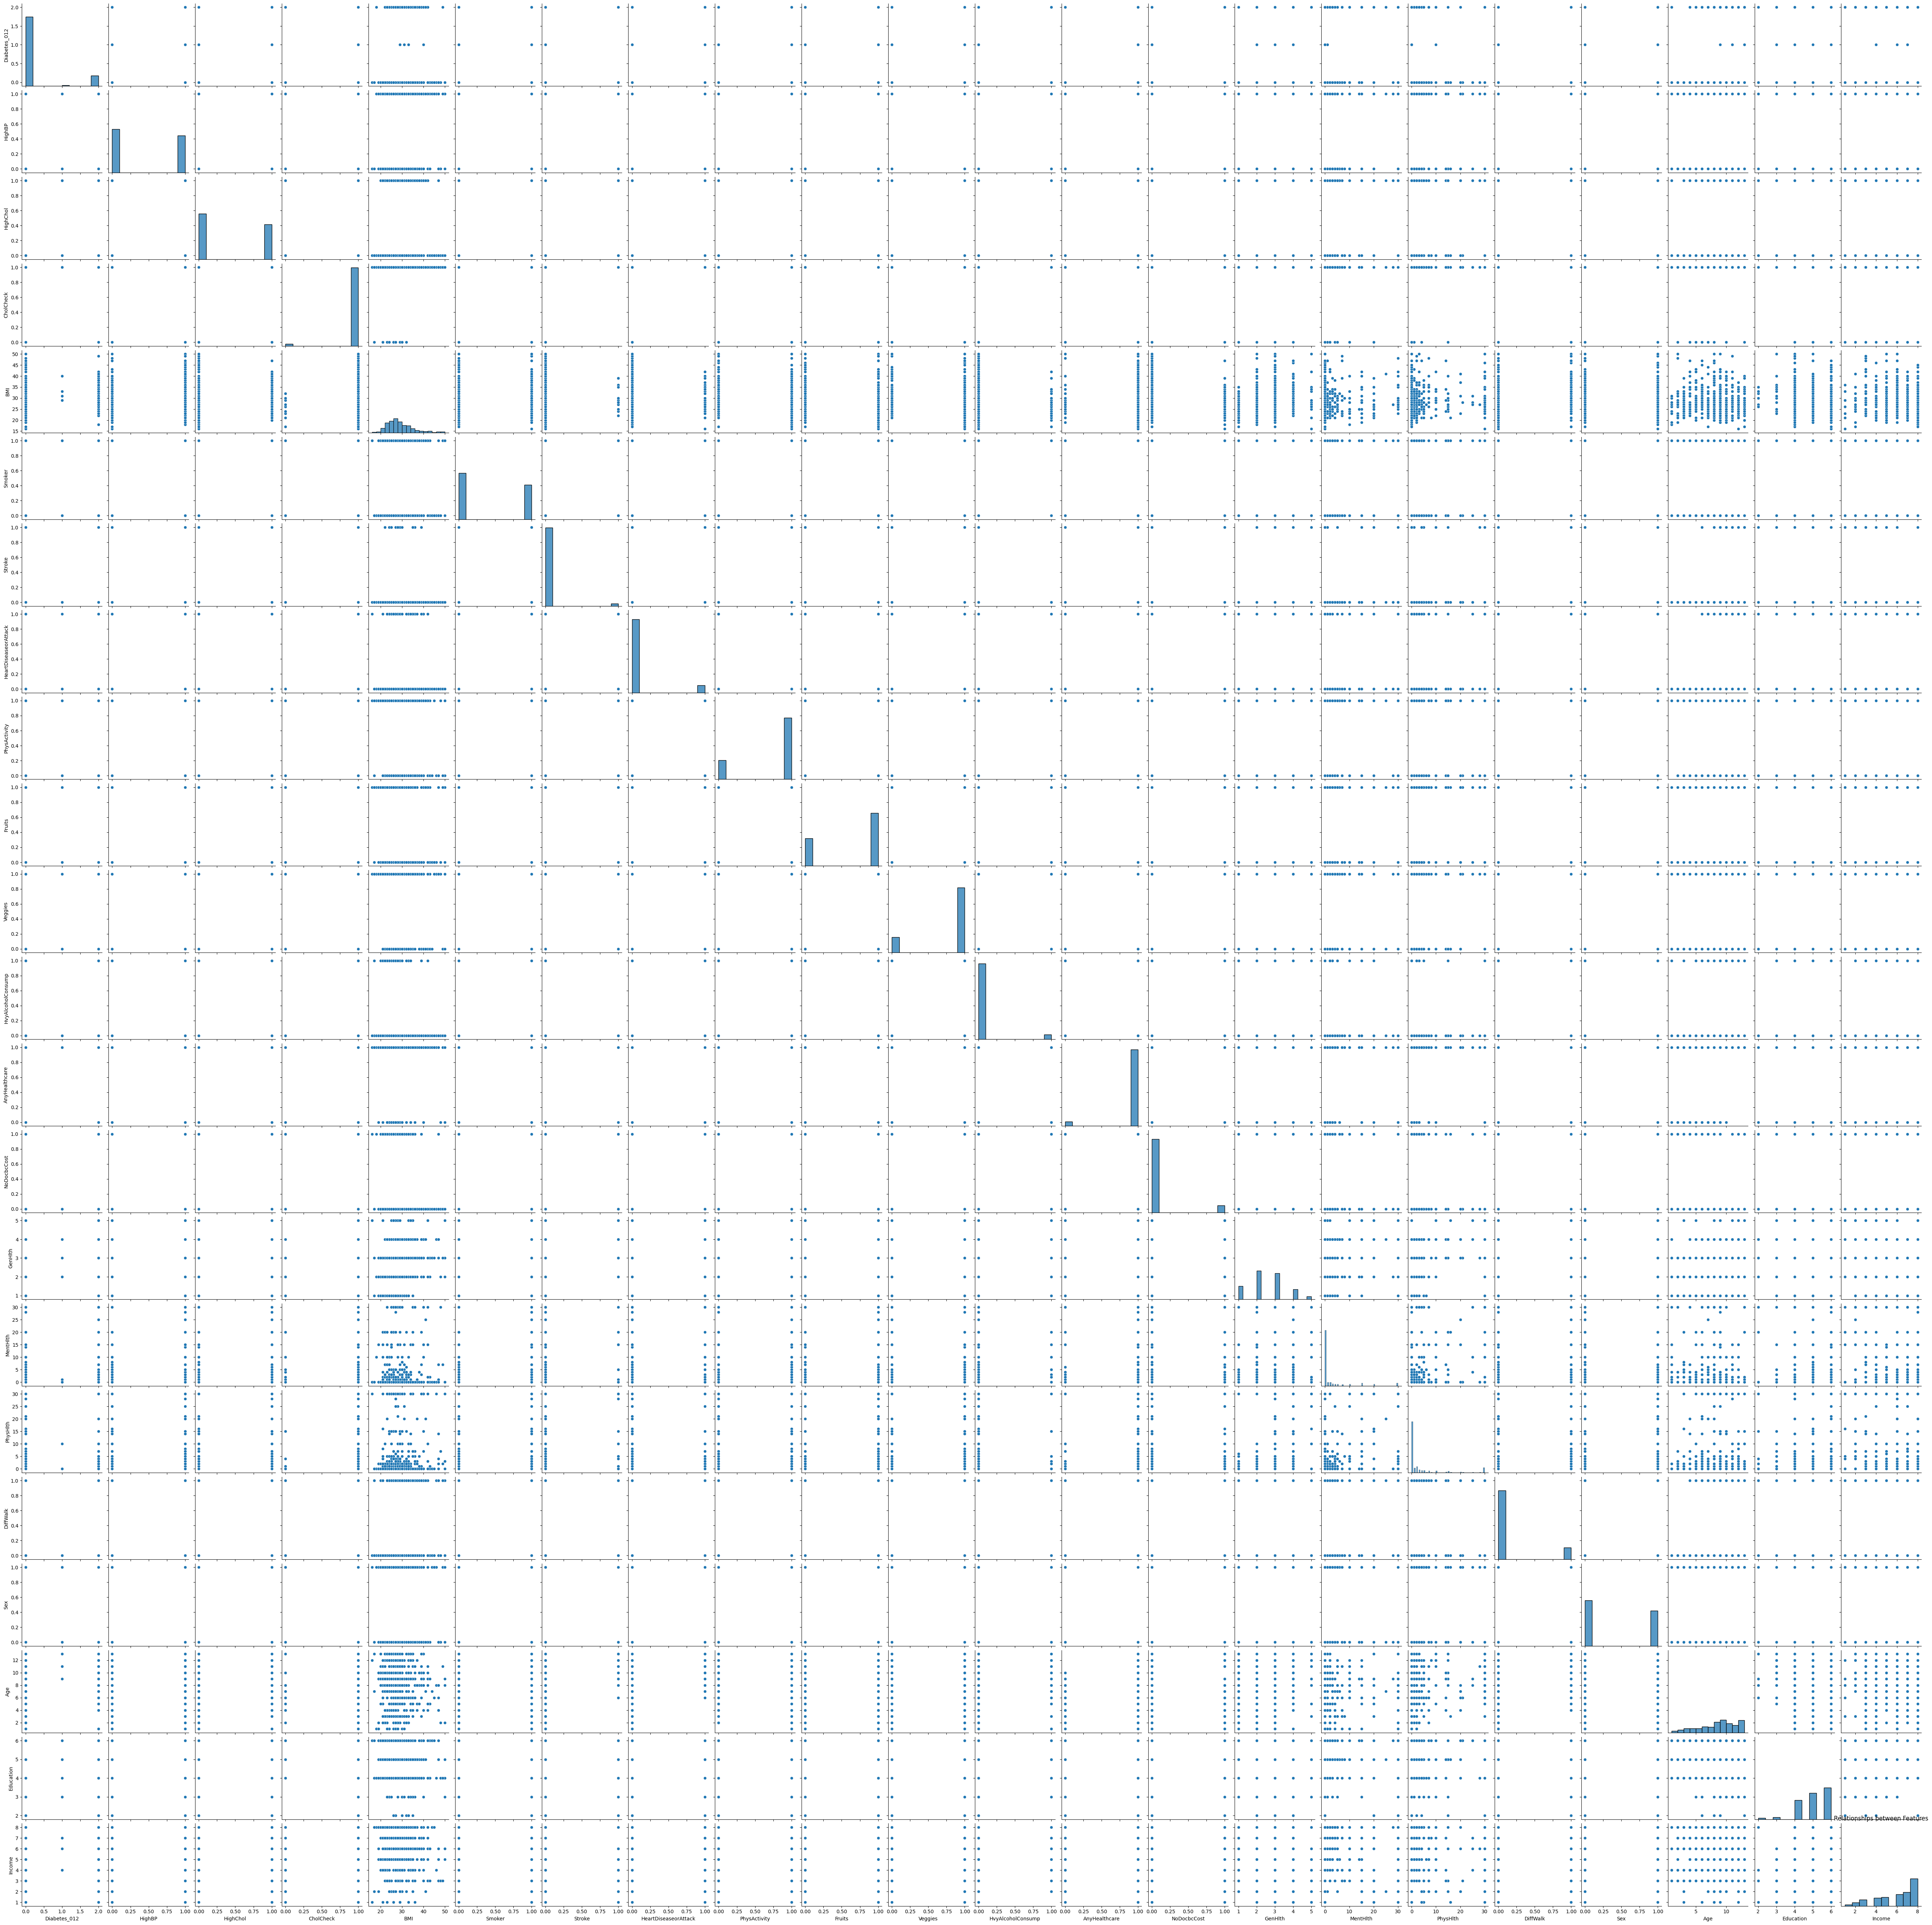

In [8]:
# Analyze relationships between features

#This was taking a veryyyyyyyyyy long time 
# sns.pairplot(df)
# plt.title('Relationships between Features')
# plt.show()

# sns_plot = sns.pairplot(df, height=2.0)
# sns_plot.savefig("pairplot.png")
# plt.clf() # Clean parirplot figure from sns 
# Image(filename='pairplot.png') # Show pairplot as image

# sns.pairplot(df, diag_kind='kde')

sns.pairplot(df.sample(500))
plt.title('Relationships between Features')
plt.show()

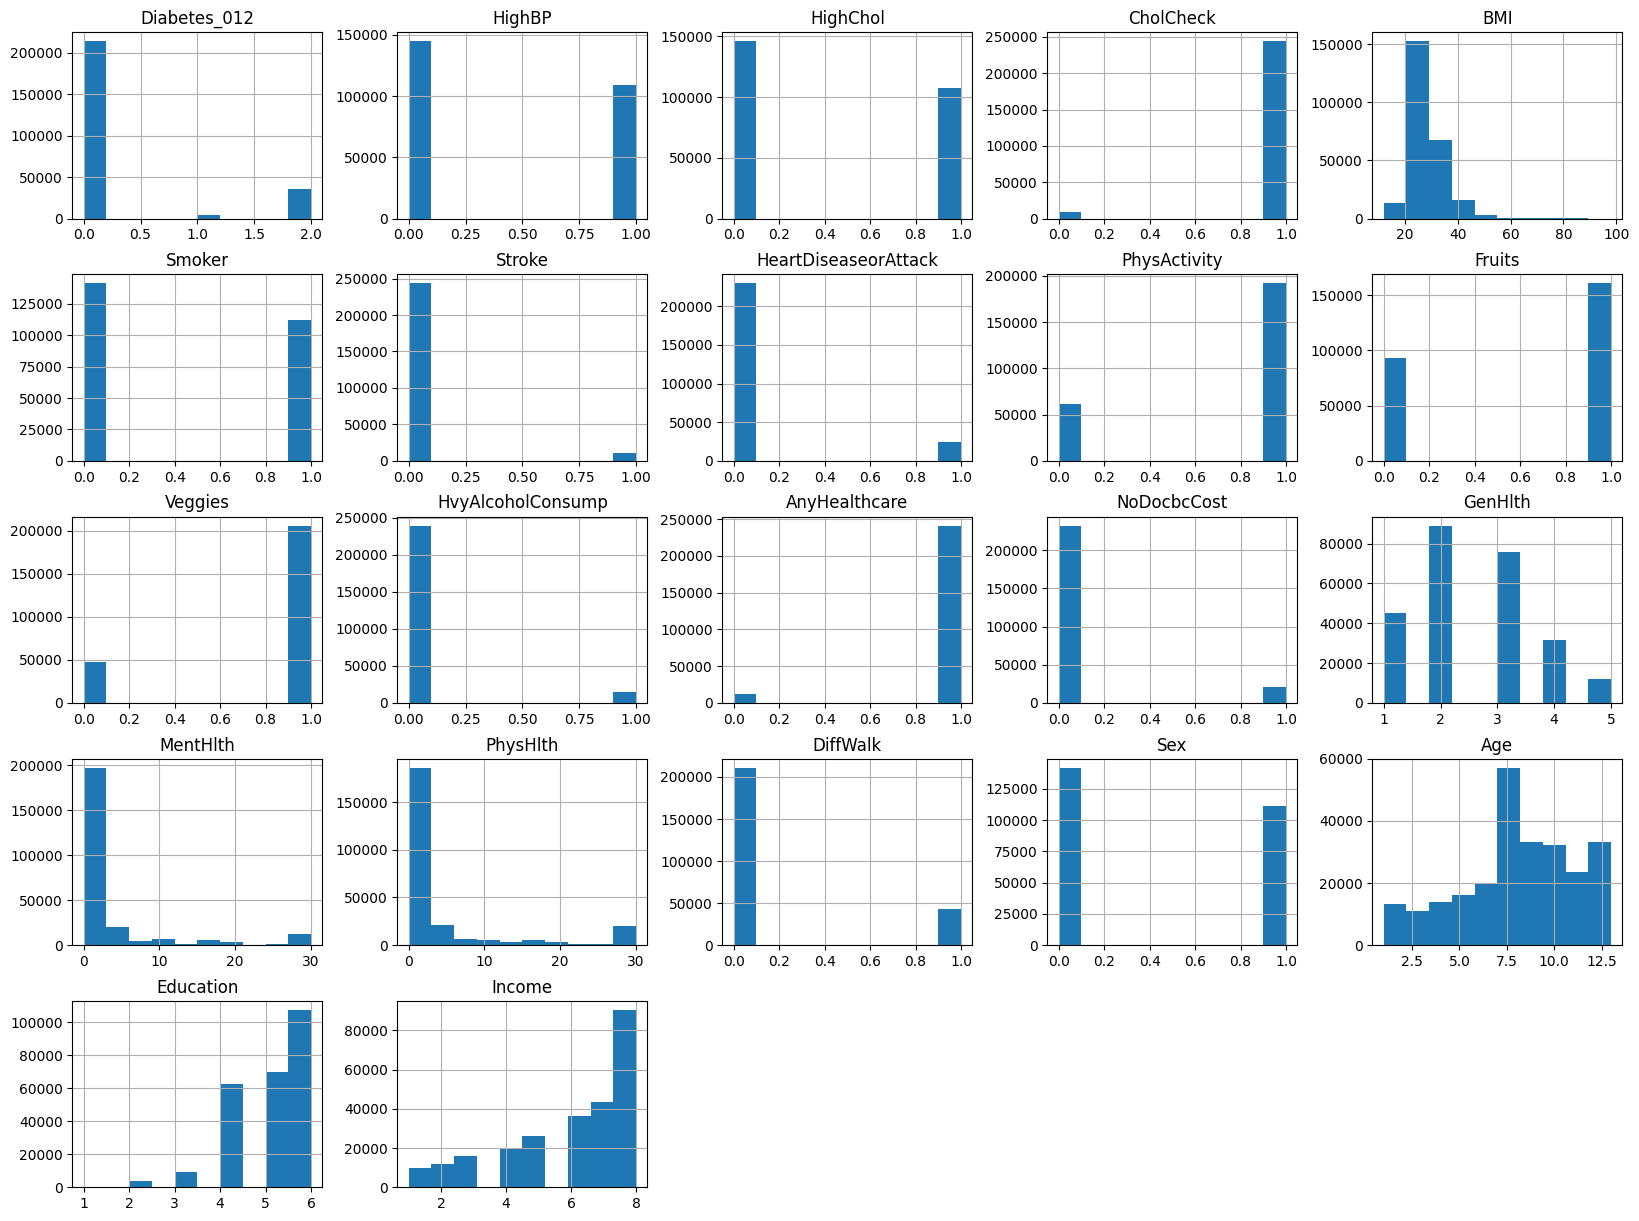

In [9]:
df.hist(figsize=(20,15));

#### Step2: Exploratory Data Analysis for assigned questions

In [10]:
# Identify the variables and their types
variable_types = df.dtypes
print("\nVariable Types:")
print(variable_types)


Variable Types:
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [26]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
# Clean the data
# Remove duplicates
df = df.drop_duplicates()
df.shape

(229781, 22)

In [27]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
# Replace missing values with appropriate methods, e.g., mean, median, or mode
# No need of this since there are no missing values
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)
df.head()

C:\Users\reeth\AppData\Local\Temp\ipykernel_16540\1841601855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mean(), inplace=True)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### Transformation:
Transformation - Standardization or Normalization:
Standardization and normalization are common data transformation techniques used in data preprocessing. They help to ensure that all features have a similar scale, which can be beneficial for certain machine learning algorithms and statistical analyses. The specific choice between standardization and normalization depends on the distribution of the data and the requirements of the analysis.


Standardization (Z-score normalization): It transforms the data so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean from each data point and dividing it by the standard deviation. Standardization is useful when the data have different scales or units, and when the distribution is approximately Gaussian (bell-shaped).


Normalization (min-max scaling): It transforms the data so that it falls within a specified range, typically between 0 and 1. This is done by subtracting the minimum value and dividing it by the range (maximum value minus minimum value). Normalization is useful when the data need to be scaled to a specific range and when the distribution is not necessarily Gaussian.

In [13]:
# Transformation
# Perform standardization or normalization if necessary
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [14]:
#Checking the data after standardization
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.head())

   Diabetes_012    HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0     -0.449376  1.095675  1.124132   0.205356  1.667220  1.071208 -0.216455   
1     -0.449376 -0.912679 -0.889575  -4.869594 -0.543101  1.071208 -0.216455   
2     -0.449376  1.095675  1.124132   0.205356 -0.101037 -0.933526 -0.216455   
3     -0.449376  1.095675 -0.889575   0.205356 -0.248391 -0.933526 -0.216455   
4     -0.449376  1.095675  1.124132   0.205356 -0.690456 -0.933526 -0.216455   

   HeartDiseaseorAttack  PhysActivity    Fruits  ...  AnyHealthcare  \
0             -0.339257     -1.658403 -1.258473  ...       0.238745   
1             -0.339257      0.602990 -1.258473  ...      -4.188578   
2             -0.339257     -1.658403  0.794614  ...       0.238745   
3             -0.339257      0.602990  0.794614  ...       0.238745   
4             -0.339257      0.602990  0.794614  ...       0.238745   

   NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk       Sex       Age  \
0    -0.319852

In [28]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

##### Encoding categorical variables to numerical:

Machine learning algorithms typically require numerical input data, so categorical variables need to be encoded into a numerical format. Two common encoding techniques are Label Encoding and One-Hot Encoding.

Since all the variables are already in numerical form, we can skip this step.

In [15]:
#But here we need to convert numerical data to categorical in order to understand the data easily

df_copy = df.copy()

In [16]:
df_copy.Age[df_copy['Age'] == 1] = '18 to 24'
df_copy.Age[df_copy['Age'] == 2] = '25 to 29'
df_copy.Age[df_copy['Age'] == 3] = '30 to 34'
df_copy.Age[df_copy['Age'] == 4] = '35 to 39'
df_copy.Age[df_copy['Age'] == 5] = '40 to 44'
df_copy.Age[df_copy['Age'] == 6] = '45 to 49'
df_copy.Age[df_copy['Age'] == 7] = '50 to 54'
df_copy.Age[df_copy['Age'] == 8] = '55 to 59'
df_copy.Age[df_copy['Age'] == 9] = '60 to 64'
df_copy.Age[df_copy['Age'] == 10] = '65 to 69'
df_copy.Age[df_copy['Age'] == 11] = '70 to 74'
df_copy.Age[df_copy['Age'] == 12] = '75 to 79'
df_copy.Age[df_copy['Age'] == 13] = '80 or older'

df_copy.Diabetes_012[df_copy['Diabetes_012'] == 0] = 'No Diabetes'
df_copy.Diabetes_012[df_copy['Diabetes_012'] == 1] = 'Pre Diabetes'
df_copy.Diabetes_012[df_copy['Diabetes_012'] == 2] = 'Diabetes'

df_copy.HighBP[df_copy['HighBP'] == 0] = 'No High'
df_copy.HighBP[df_copy['HighBP'] == 1] = 'High BP'

df_copy.HighChol[df_copy['HighChol'] == 0] = 'No High Cholesterol'
df_copy.HighChol[df_copy['HighChol'] == 1] = 'High Cholesterol'

df_copy.CholCheck[df_copy['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_copy.CholCheck[df_copy['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_copy.Smoker[df_copy['Smoker'] == 0] = 'No'
df_copy.Smoker[df_copy['Smoker'] == 1] = 'Yes'

df_copy.Stroke[df_copy['Stroke'] == 0] = 'No'
df_copy.Stroke[df_copy['Stroke'] == 1] = 'Yes'

df_copy.HeartDiseaseorAttack[df_copy['HeartDiseaseorAttack'] == 0] = 'No'
df_copy.HeartDiseaseorAttack[df_copy['HeartDiseaseorAttack'] == 1] = 'Yes'

df_copy.PhysActivity[df_copy['PhysActivity'] == 0] = 'No'
df_copy.PhysActivity[df_copy['PhysActivity'] == 1] = 'Yes'

df_copy.Fruits[df_copy['Fruits'] == 0] = 'No'
df_copy.Fruits[df_copy['Fruits'] == 1] = 'Yes'

df_copy.Veggies[df_copy['Veggies'] == 0] = 'No'
df_copy.Veggies[df_copy['Veggies'] == 1] = 'Yes'

df_copy.HvyAlcoholConsump[df_copy['HvyAlcoholConsump'] == 0] = 'No'
df_copy.HvyAlcoholConsump[df_copy['HvyAlcoholConsump'] == 1] = 'Yes'

df_copy.AnyHealthcare[df_copy['AnyHealthcare'] == 0] = 'No'
df_copy.AnyHealthcare[df_copy['AnyHealthcare'] == 1] = 'Yes'

df_copy.NoDocbcCost[df_copy['NoDocbcCost'] == 0] = 'No'
df_copy.NoDocbcCost[df_copy['NoDocbcCost'] == 1] = 'Yes'

df_copy.GenHlth[df_copy['GenHlth'] == 5] = 'Excellent'
df_copy.GenHlth[df_copy['GenHlth'] == 4] = 'Very Good'
df_copy.GenHlth[df_copy['GenHlth'] == 3] = 'Good'
df_copy.GenHlth[df_copy['GenHlth'] == 2] = 'Fair'
df_copy.GenHlth[df_copy['GenHlth'] == 1] = 'Poor'

df_copy.DiffWalk[df_copy['DiffWalk'] == 0] = 'No'
df_copy.DiffWalk[df_copy['DiffWalk'] == 1] = 'Yes'

df_copy.Sex[df_copy['Sex'] == 0] = 'Female'
df_copy.Sex[df_copy['Sex'] == 1] = 'Male'

df_copy.Education[df_copy['Education'] == 1] = 'Never Attended School'
df_copy.Education[df_copy['Education'] == 2] = 'Elementary'
df_copy.Education[df_copy['Education'] == 3] = 'Junior High School'
df_copy.Education[df_copy['Education'] == 4] = 'Senior High School'
df_copy.Education[df_copy['Education'] == 5] = 'Undergraduate Degree'
df_copy.Education[df_copy['Education'] == 6] = 'Magister'

df_copy.Income[df_copy['Income'] == 1] = 'Less Than $10,000'
df_copy.Income[df_copy['Income'] == 2] = 'Less Than $10,000'
df_copy.Income[df_copy['Income'] == 3] = 'Less Than $10,000'
df_copy.Income[df_copy['Income'] == 4] = 'Less Than $10,000'
df_copy.Income[df_copy['Income'] == 5] = 'Less Than $35,000'
df_copy.Income[df_copy['Income'] == 6] = 'Less Than $35,000'
df_copy.Income[df_copy['Income'] == 7] = 'Less Than $35,000'
df_copy.Income[df_copy['Income'] == 8] = '$75,000 or More'

df_copy.head()

C:\Users\reeth\AppData\Local\Temp\ipykernel_16540\855523103.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.Diabetes_012[df_copy['Diabetes_012'] == 0] = 'No Diabetes'
C:\Users\reeth\AppData\Local\Temp\ipykernel_16540\855523103.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.HighBP[df_copy['HighBP'] == 0] = 'No High'
C:\Users\reeth\AppData\Local\Temp\ipykernel_16540\855523103.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,...,Yes,No,Excellent,18.0,15.0,Yes,Female,60 to 64,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,...,Yes,Yes,Excellent,30.0,30.0,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,...,Yes,No,Fair,0.0,0.0,No,Female,70 to 74,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,...,Yes,No,Fair,3.0,0.0,No,Female,70 to 74,Undergraduate Degree,"Less Than $10,000"


#### Data Visualization:

Text(0.5, 1.0, 'Correlation of features')

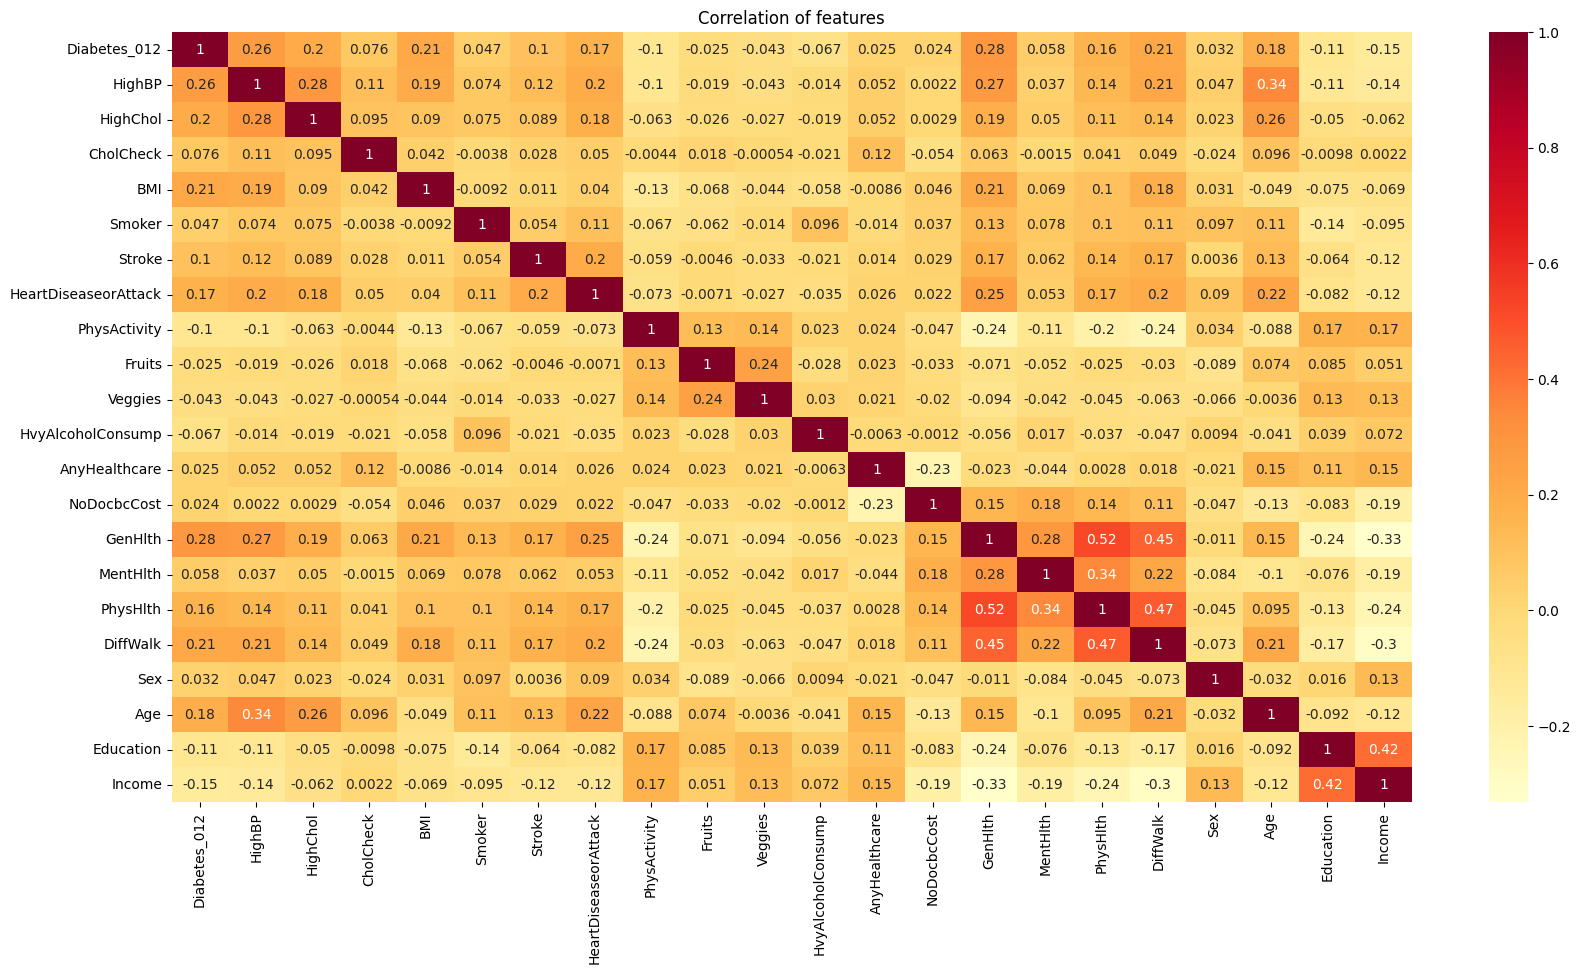

In [17]:
# Data Visualization
# Example: Bar plot for a categorical variable
#using heatmap to understand correlation better in dataset
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation of features")


Conclusion from heatmap:
    
* Positive correlation:
    (GenHlth - PhysHlth ),(PhysHlth - DiffWalk),(GenHlth - DiffWalk )
* Negative correlation: 
    (GenHlth - Income ) , (DiffWalk - Income)
    

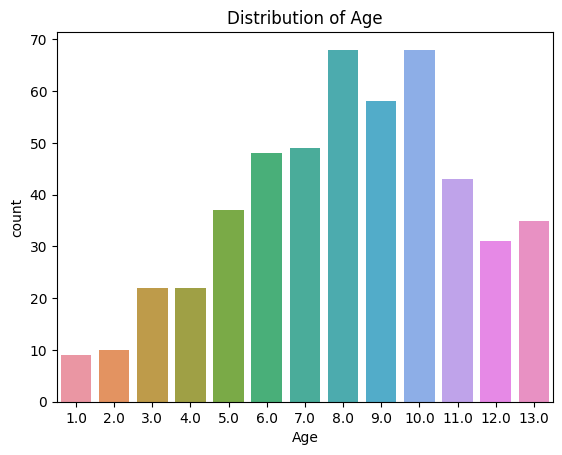

In [18]:
sns.countplot(df.sample(500), x='Age')
plt.title('Distribution of Age')
plt.show()

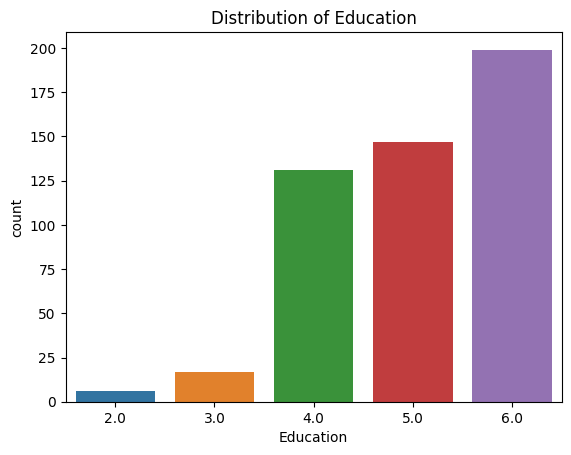

In [19]:
sns.countplot(df.sample(500), x='Education')
plt.title('Distribution of Education')
plt.show()

C:\Users\reeth\AppData\Local\Temp\ipykernel_16540\1885057207.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


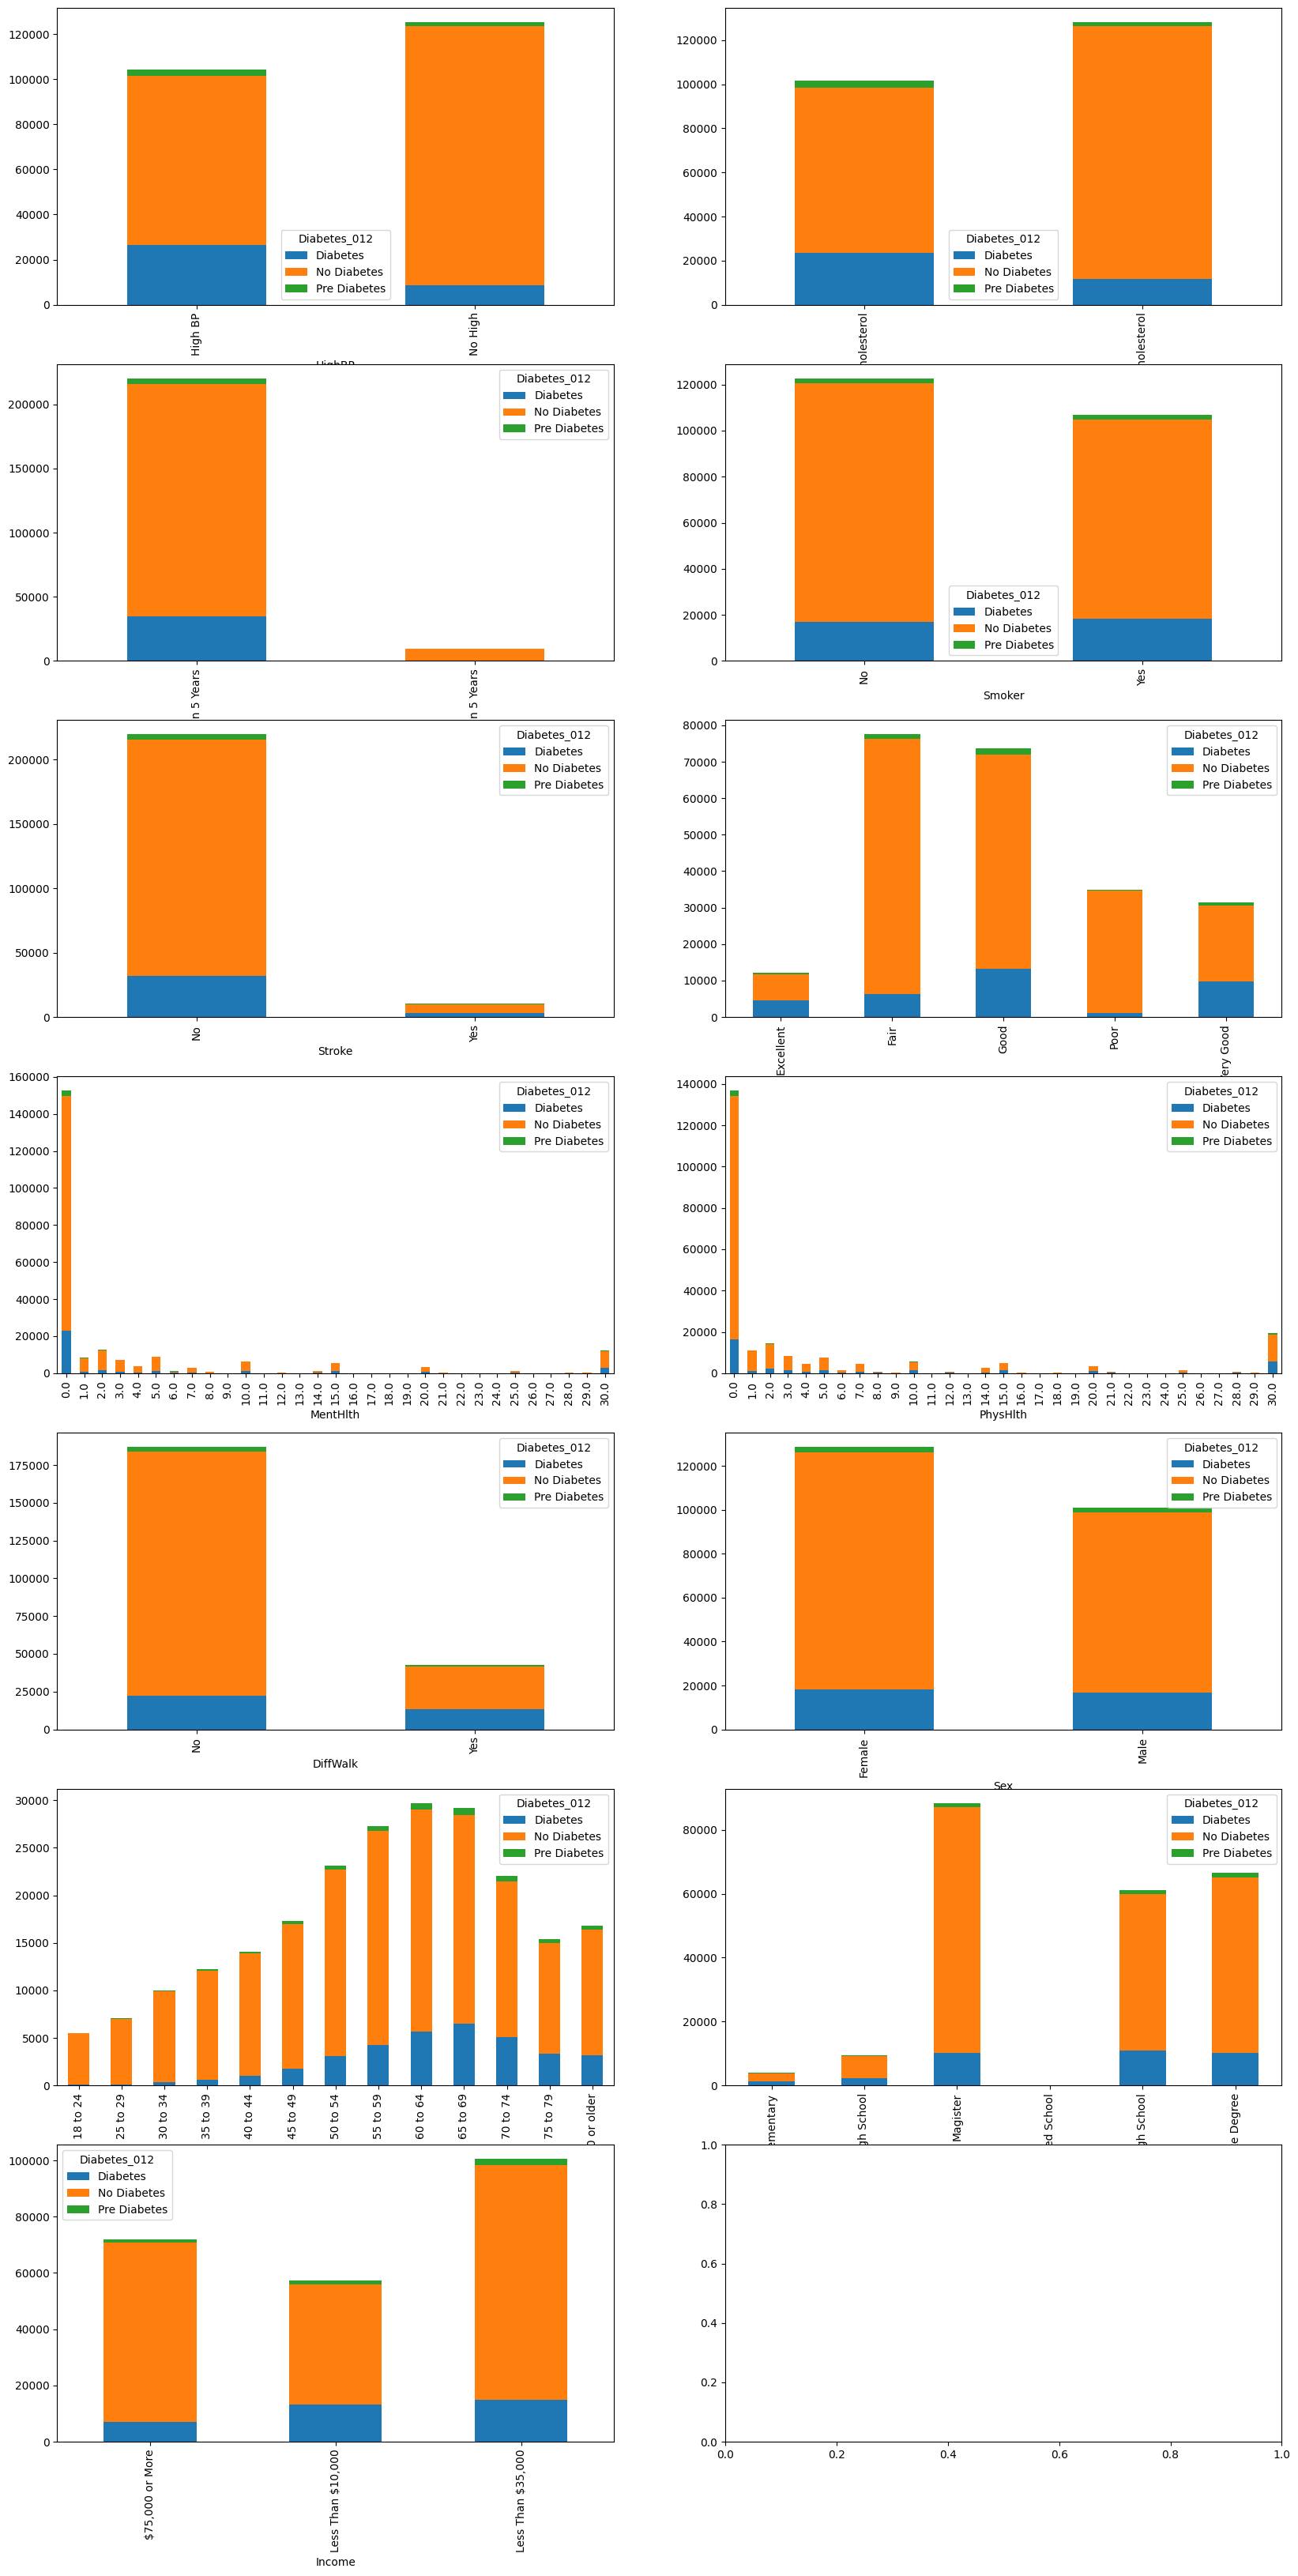

In [20]:
cols = [ 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex','Age','Education','Income' ]
def create_plot_pivot(df_copy, x_column):
    _df_plot = df_copy.groupby([x_column, 'Diabetes_012']).size() \
    .reset_index().pivot(columns='Diabetes_012', index=x_column, values=0)
    return _df_plot

fig, ax = plt.subplots(7, 2, figsize=(20,40))
axe = ax.ravel()

for i in range(len(cols)):
    create_plot_pivot(df_copy, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()


#### Define your research questions and perform Hypothesis testing:

In [21]:
# Research question 1: 
# What is the prevalence of diabetes, high blood pressure, high cholesterol, stroke, heart disease or attack among the population?
diabetes_prevalence = df['Diabetes_012'].mean()
bp_prevalence = df['HighBP'].mean()
cholesterol_prevalence = df['HighChol'].mean()
stroke_prevalence = df['Stroke'].mean()
heart_disease_prevalence = df['HeartDiseaseorAttack'].mean()

print(
"Here is the conclusion to 1st research question: \nWhat is the prevalence of diabetes, high blood pressure, high cholesterol, stroke, heart disease or attack among the population?\n \n"
"Diabetes: ", diabetes_prevalence*100,"%\n", 
"High blood pressure: ", bp_prevalence*100,"%\n",
"High Cholesterol: ", cholesterol_prevalence*100,"%\n",
"Stroke: ", stroke_prevalence*100,"%\n",
"Heart disease: ", heart_disease_prevalence*100,"%\n",
)

Here is the conclusion to 1st research question: 
What is the prevalence of diabetes, high blood pressure, high cholesterol, stroke, heart disease or attack among the population?
 
Diabetes:  32.562744526309835 %
 High blood pressure:  45.44414029010231 %
 High Cholesterol:  44.175976255652124 %
 Stroke:  4.4755658648887415 %
 Heart disease:  10.3215670573285 %



In [22]:
# Research question 2: Association between risk factors and health conditions
#Is there a relationship between certain risk factors (such as smoking, physical activity, diet) and the prevalence of these health conditions?

# Hypothesis testing 1: Prevalence of diabetes among different age groups
contingency_table = pd.crosstab(df['Age'], df['Diabetes_012'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a significant association between age and the prevalence of diabetes.")
else:
    print("There is no significant association between age and the prevalence of diabetes.")

There is a significant association between age and the prevalence of diabetes.


In [23]:
# Hypothesis testing 2: Association between physical activity and heart disease or attack
physical_activity = df['DiffWalk'].dropna()
heart_disease = df['HeartDiseaseorAttack'].dropna()

active_group = physical_activity[heart_disease == 1]
inactive_group = physical_activity[heart_disease == 0]

active_mean = active_group.mean()
active_std = active_group.std()
active_count = active_group.count()

inactive_mean = inactive_group.mean()
inactive_std = inactive_group.std()
inactive_count = inactive_group.count()

t_stat, p_value = ttest_ind_from_stats(active_mean, active_std, active_count, inactive_mean, inactive_std, inactive_count)

if p_value < 0.05:
    print("There is a significant association between physical activity level and the risk of heart disease or attack.")
else:
    print("There is no association between physical activity level and the risk of heart disease or attack.")

There is a significant association between physical activity level and the risk of heart disease or attack.


There is a significant difference in cholesterol levels based on education.


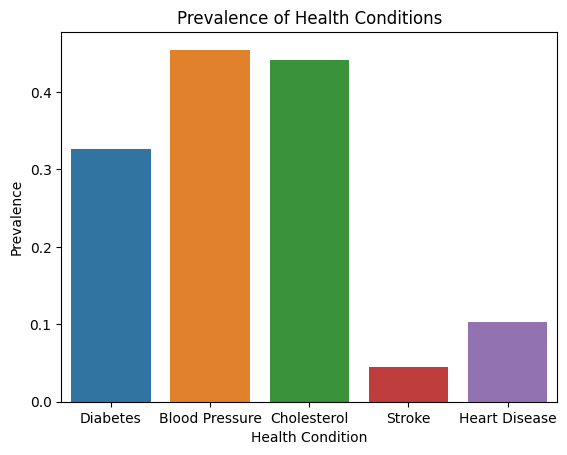

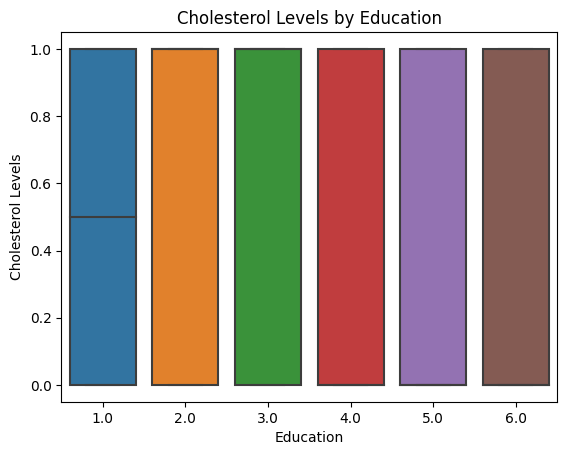

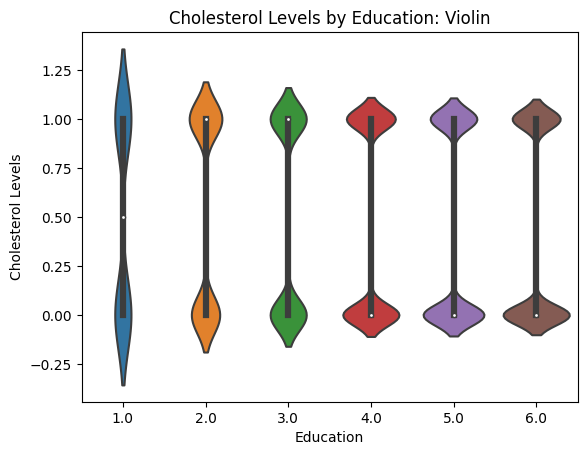

In [24]:
# Research question 3: Differences in health outcomes based on demographic factors
# Perform ANOVA to assess the impact of education on cholesterol levels
model = ols('HighChol ~ Education', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

if anova_table['PR(>F)'][0] < 0.05:
    print("There is a significant difference in cholesterol levels based on education.")
else:
    print("There is no significant difference in cholesterol levels based on education.")

# Visualize the results
# Bar plot for health condition prevalence
prevalence_data = pd.DataFrame({'Health Condition': ['Diabetes', 'Blood Pressure', 'Cholesterol', 'Stroke', 'Heart Disease'],
                               'Prevalence': [diabetes_prevalence, bp_prevalence, cholesterol_prevalence,
                                              stroke_prevalence, heart_disease_prevalence]})
sns.barplot(x='Health Condition', y='Prevalence', data=prevalence_data)
plt.title('Prevalence of Health Conditions')
plt.ylabel('Prevalence')
plt.show()

# Box plot for cholesterol levels by education
sns.boxplot(x='Education', y='HighChol', data=df)
plt.title('Cholesterol Levels by Education')
plt.xlabel('Education')
plt.ylabel('Cholesterol Levels')
plt.show()

sns.violinplot(x='Education', y='HighChol', data=df)
plt.title('Cholesterol Levels by Education: Violin')
plt.xlabel('Education')
plt.ylabel('Cholesterol Levels')
plt.show()

# sns.barplot(x='Education', y='HighChol', data=df)
# plt.title('Cholesterol Levels by Education')
# plt.xlabel('Education')
# plt.ylabel('Cholesterol Levels')
# plt.show()